In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
titanic=pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [7]:
titanic.shape

(891, 9)

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
titanic['Embarked'].fillna('S',inplace=True)

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [20]:
avgage=titanic['Age'].mean()

In [21]:
titanic['Age'].fillna(avgage,inplace=True)

In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

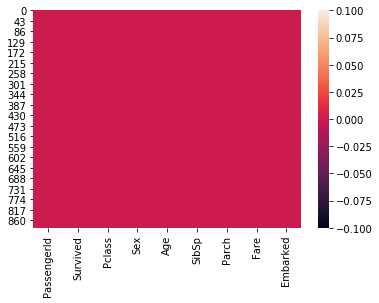

In [23]:
sns.heatmap(titanic.isnull())

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic['Embarked']=le.fit_transform(titanic['Embarked'])

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [30]:
titanic.drop(['PassengerId'],axis=1,inplace=True)

In [31]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


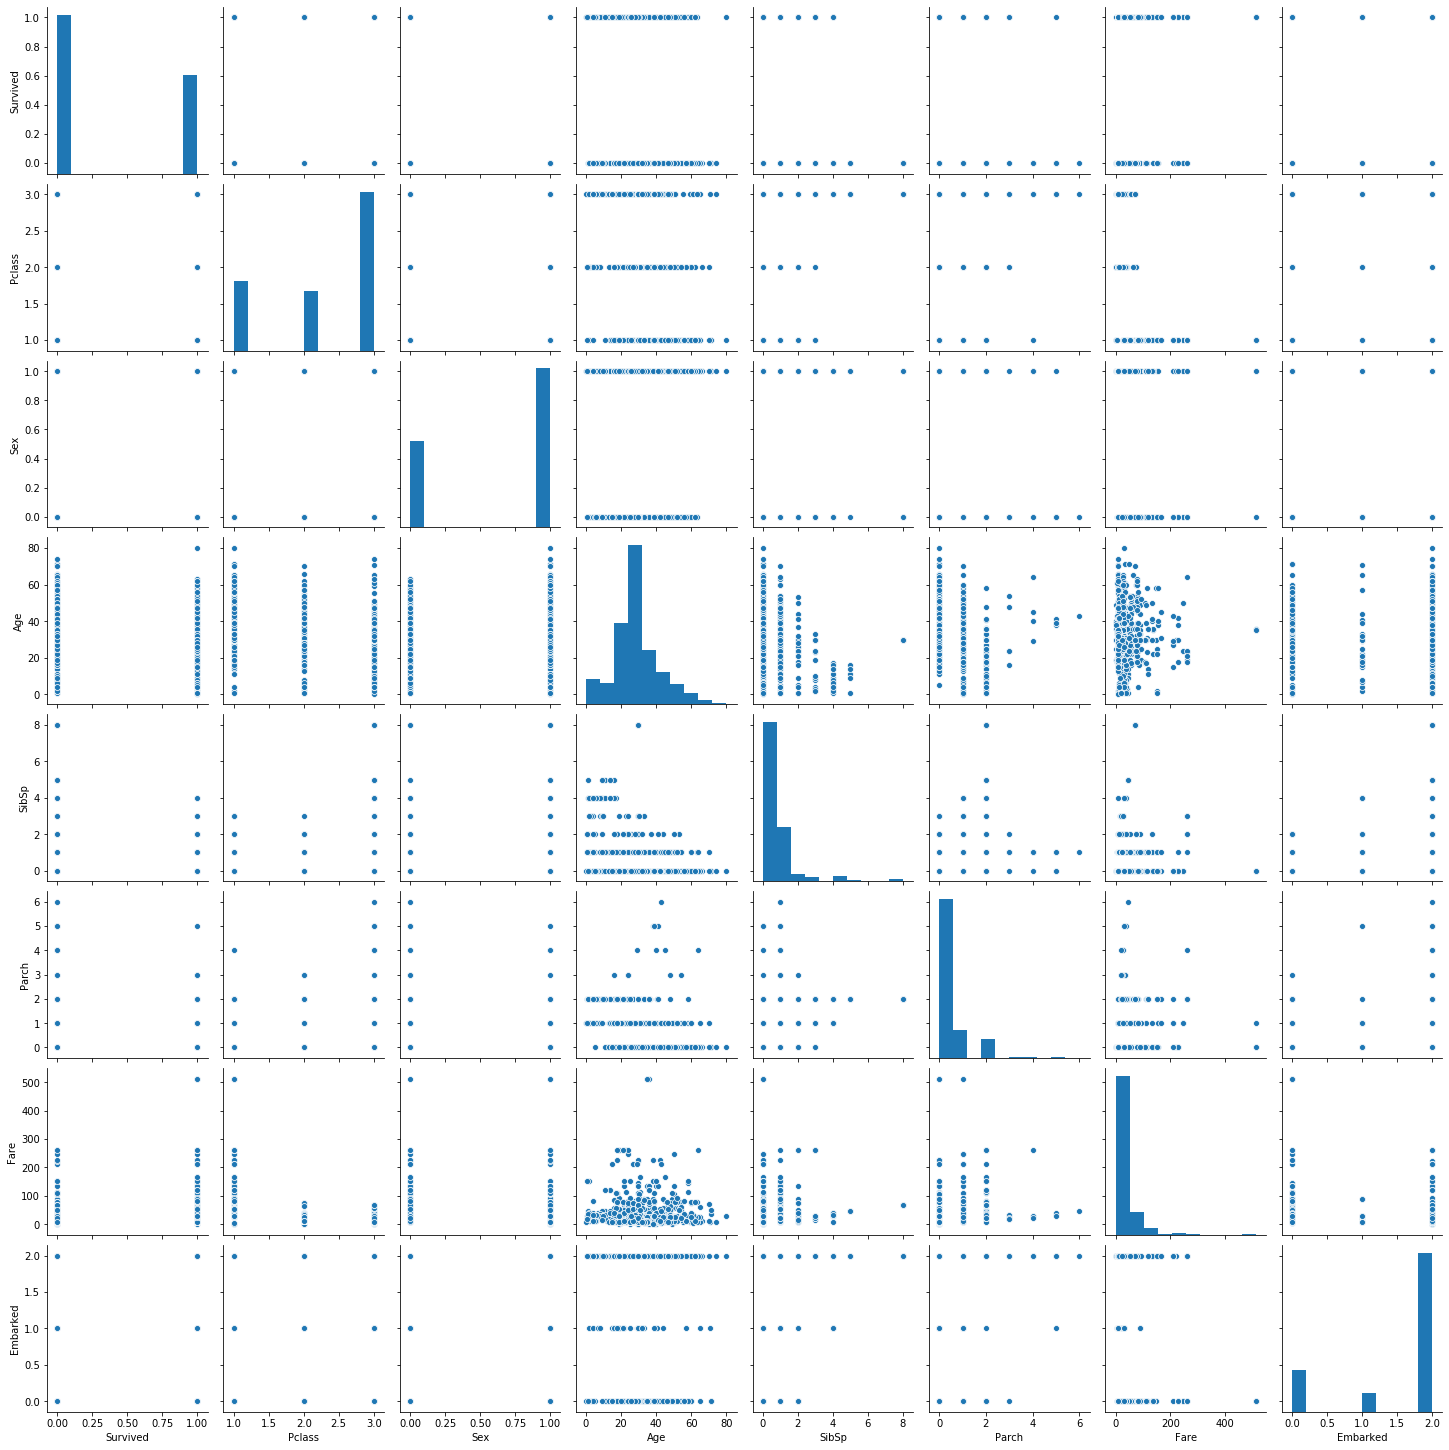

In [33]:
sns.pairplot(titanic)

In [35]:
tcorr=titanic.corr()
tcorr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


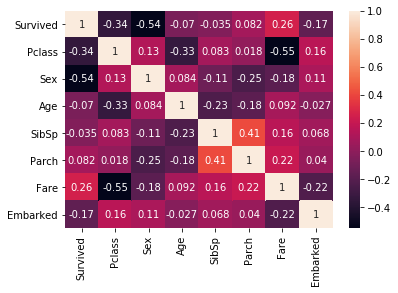

In [36]:
sns.heatmap(tcorr,annot=True)

In [41]:
collist=titanic.columns.values
ncol=8
nrow=3

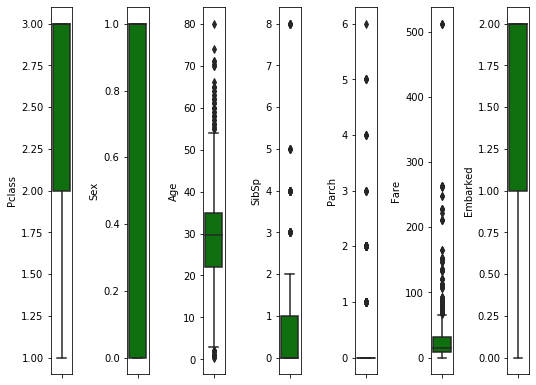

In [43]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(titanic[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [45]:
from scipy.stats import zscore
z_sc=abs(zscore(titanic))
titanic=titanic[(z_sc<3).all(axis=1)]

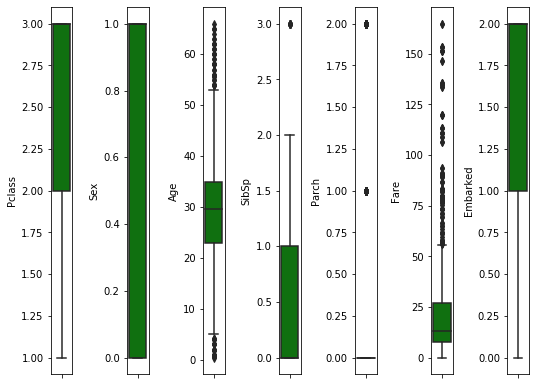

In [46]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(titanic[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [47]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [48]:
y=titanic.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [49]:
y.shape

(820,)

In [51]:
y=y.values.reshape(-1,1)
y.shape

(820, 1)

In [52]:
x=titanic.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [54]:
x.shape

(820, 7)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [56]:
x

array([[ 0.8339949 ,  0.72203588, -0.64170188, ..., -0.4511409 ,
        -0.62370675,  0.58316179],
       [-1.58680446, -1.38497273,  0.67582054, ..., -0.4511409 ,
         1.52510914, -1.95366932],
       [ 0.8339949 , -1.38497273, -0.31232128, ..., -0.4511409 ,
        -0.60105524,  0.58316179],
       ...,
       [ 0.8339949 , -1.38497273, -0.00771687, ...,  3.0889121 ,
        -0.08007059,  0.58316179],
       [-1.58680446,  0.72203588, -0.31232128, ..., -0.4511409 ,
         0.13973292, -1.95366932],
       [ 0.8339949 ,  0.72203588,  0.18174963, ..., -0.4511409 ,
        -0.60692786, -0.68525377]])

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [58]:
print(x_train.shape,x_test.shape)

(656, 7) (164, 7)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [60]:
lr=LogisticRegression()
gnb=GaussianNB()
knc=KNeighborsClassifier(n_neighbors=8)
svc=SVC()
dtc=DecisionTreeClassifier(random_state=6)
rfc=RandomForestClassifier(n_estimators=200,random_state=42)

In [61]:
models =[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('KNeighborsClassifer',knc))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

In [62]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    score.append(AS*100)
    print('Accuracy Score =',AS)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score =',sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report\n',classification_report(y_test,pred))
    print('\n')
    print('Confusion Matrix \n',confusion_matrix(y_test,pred))
    


************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score = 0.8353658536585366


Cross Val Score = 0.7926829268292683
roc-auc score = 0.8031249999999999


Classification Report
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       100
           1       0.89      0.66      0.76        64

    accuracy                           0.84       164
   macro avg       0.85      0.80      0.82       164
weighted avg       0.84      0.84      0.83       164



Confusion Matrix 
 [[95  5]
 [22 42]]
************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy Score = 0.8170731707317073

In [63]:
f_result=pd.DataFrame({'Model' : Model, 'Accuracy Score': score,'Cross_Val_Score':cvs,'ROC-AUC_Curve':rocscore})
f_result

,Model,Accuracy Score,Cross_Val_Score,ROC-AUC_Curve
0,LogisticRegression,83.536585,79.268293,80.31250
1,GaussianNB,81.707317,77.317073,78.25000
2,KNeighborsClassifer,81.097561,80.243902,76.62500
3,SVC,82.317073,81.463415,77.62500
4,DecisionTreeClassifier,76.219512,77.804878,74.59375
5,RandomForestClassifier,80.487805,79.756098,77.25000


In [64]:
#Logistic regression is used

In [68]:
from sklearn.externals import joblib
joblib.dump(lr,'titanic_survival_prediction.csv')


['titanic_survival_prediction.csv']

In [69]:
model=joblib.load('titanic_survival_prediction.csv')

In [70]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)